# **Algoritma *K-Means***

## **Pengertian *K-Means Clustering***

**K-Means Clustering** adalah salah satu metode *unsupervised learning* dalam *data mining* atau *machine learning* yang digunakan untuk mengelompokkan data ke dalam beberapa kelompok (kluster) berdasarkan kemiripan karakteristiknya. Tujuan utama dari algoritma ini adalah membagi data menjadi *K* kelompok, di mana setiap data akan masuk ke kluster dengan pusat (centroid) yang paling dekat.

## **Manfaat *Clustering***

1. **Segmentasi Data** – Mengelompokkan data berdasarkan kemiripan, seperti pelanggan atau wilayah.
2. **Pemahaman Pola** – Membantu menemukan struktur tersembunyi dalam data.
3. **Deteksi Anomali** – Mengidentifikasi data yang menyimpang dari pola umum.
4. **Sistem Rekomendasi** – Menyajikan rekomendasi berdasarkan kelompok yang terbentuk.

Hasil clustering yang baik akan menghasilkan tingkat kesamaan yang tinggi dalam satu kelas dan tingkat kesamaan yang rendah antar kelas. Kesamaan yang dimaksud merupakan pengukuran secara numerik terhadap dua buah objek. Nilai kesamaan antar kedua objek akan semakin tinggi jika kedua objek yang dibandingkan memiliki kemiripan yang tinggi. Begitu juga dengan sebaliknya. Kualitas hasil clustering sangat bergantung pada metode yang dipakai

## **Inertia (Sum Square Error/SSE)**


Dalam konteks algoritma *K-Means Clustering*, *inertia* (Sum Square Error/SSE) adalah salah satu metrik evaluasi untuk menilai seberapa baik data dikelompokkan ke dalam klaster serta mengukur jumlah total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat titik tersebut.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette Analysis**


Silhouette Analysis adalah metrik evaluasi lain yang lebih baik dari inertia dalam banyak kasus untuk mengevaluasi hasil clustering, seperti pada K-Means, karena mempertimbangkan dua hal sekaligus yaitu:

- Kepadatan dalam klaster

- Jarak antar klaster

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.3 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-2784e994-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_7OwV6So2k6qKTb1yXO0",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel2")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-a971b40-malikaauliaaa2-1544.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_xWwDDfEtRsiv7WGcUgO",
        database="defaultdb",
        port=26315
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM tabel1")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          12.0         10.0           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          17.0         20.0           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa          10.0         14.0          54.0         39.0
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           9.0          5.0           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa          20.0         10.0          54.0         37.0
 12     Iris-setosa           1.6          0.2          48.0         34.0
 13     Iris-setosa           1.4     

## Data asli sebelum di normalisasi

Ini merupakan data sebelum normalisasi

In [4]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
         12.0         10.0           5.1          3.5
         14.0          2.0          40.9         30.0
         17.0         20.0           4.7          3.2
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
         10.0         14.0          54.0         39.0
          1.4          0.3           4.6          3.4
          9.0          5.0           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
         20.0         10.0          54.0         37.0
          1.6          0.2          48.0         34.0
          1.4          0.1           4.8          3.0
          1.1          0.1          43.0         30.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
         16.0         12.0  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Ini merupakan visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

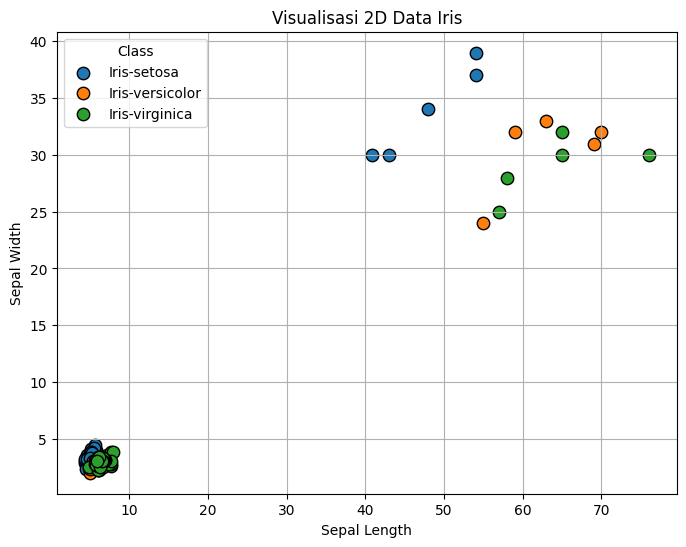

In [5]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini merupakan visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

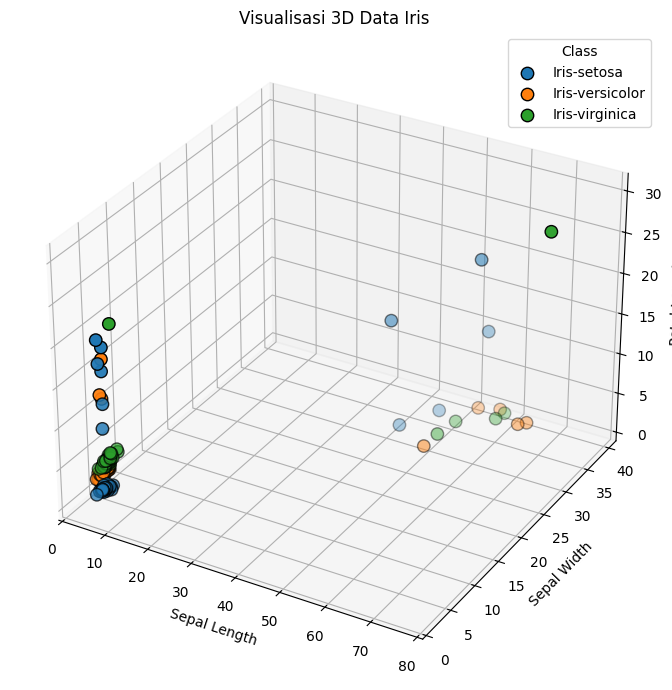

In [6]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini merupakan visualisasi data Iris secara 2 Dimensi menggunakan PCA

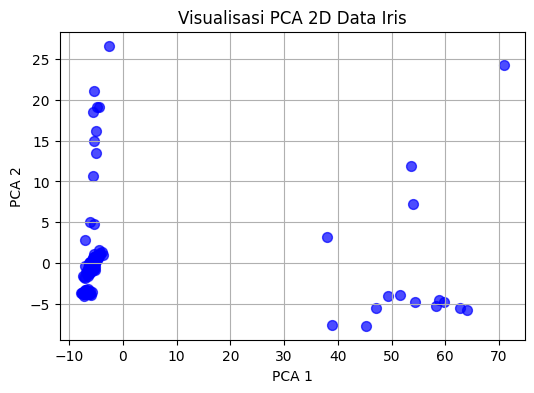

In [7]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini merupakan visualisasi data Iris secara 3 Dimensi menggunakan PCA

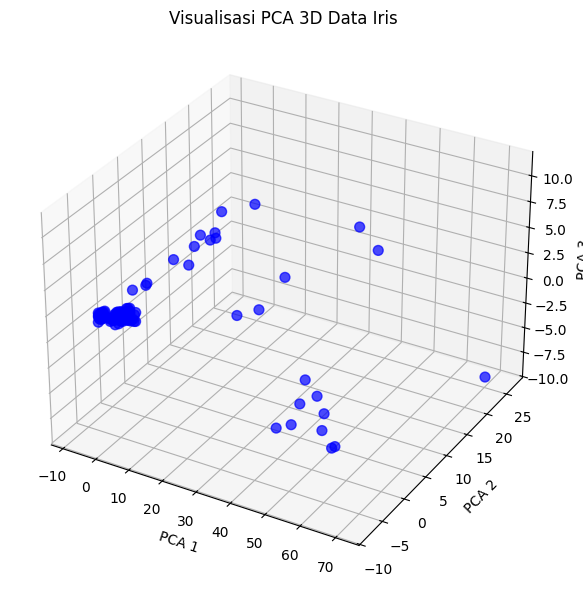

In [8]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Saya menerapkan **normalisasi menggunakan MinMaxScaler** untuk menyamakan skala fitur dalam dataset, karena setiap fitur memiliki rentang nilai yang berbeda. Ini penting agar algoritma yang bergantung pada jarak seperti **KNN** atau **SVM** tidak berat sebelah terhadap fitur tertentu.

MinMaxScaler mengubah nilai setiap fitur ke rentang **0 hingga 1**, berdasarkan nilai minimum dan maksimum fitur tersebut. Setelah normalisasi, performa model menjadi lebih stabil dan akurat. Langkah ini menunjukkan bahwa normalisasi adalah bagian penting dalam memastikan kualitas data sebelum diterapkan ke model machine learning.


In [9]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [10]:
print (scaled_features);

[[0.37931034 0.43231441 0.00977654 0.04054054]
 [0.44827586 0.08296943 0.50977654 0.75675676]
 [0.55172414 0.86899563 0.00418994 0.03243243]
 [0.01724138 0.00436681 0.0027933  0.02972973]
 [0.0137931  0.00436681 0.00837989 0.04324324]
 [0.31034483 0.6069869  0.69273743 1.        ]
 [0.0137931  0.00873362 0.0027933  0.03783784]
 [0.27586207 0.2139738  0.00837989 0.03783784]
 [0.0137931  0.00436681 0.         0.02432432]
 [0.01724138 0.         0.00698324 0.02972973]
 [0.65517241 0.43231441 0.69273743 0.94594595]
 [0.02068966 0.00436681 0.60893855 0.86486486]
 [0.0137931  0.         0.00558659 0.02702703]
 [0.00344828 0.         0.53910615 0.75675676]
 [0.00689655 0.00436681 0.01955307 0.05405405]
 [0.01724138 0.01310044 0.01815642 0.06486486]
 [0.01034483 0.01310044 0.01396648 0.05135135]
 [0.51724138 0.51965066 0.00977654 0.04054054]
 [0.02413793 0.00873362 0.01815642 0.04864865]
 [0.01724138 0.00873362 0.00977654 0.04864865]
 [0.02413793 0.00436681 0.01396648 0.03783784]
 [0.01724138 

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Dalam analisis ini saya melakukan clustering menggunakan K-Means dengan 2 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 8.2895, Silhouette Score: 0.8241


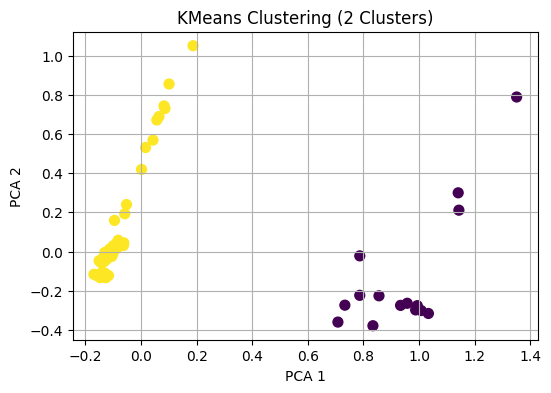

In [11]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 8.2895, Silhouette Score: 0.8241


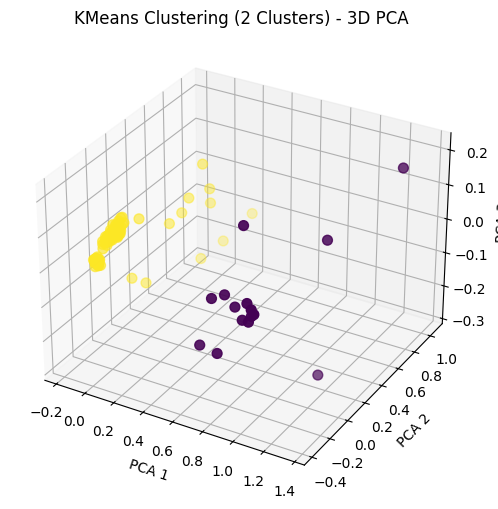

In [12]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan K-Means dengan 3 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.5014, Silhouette Score: 0.8313


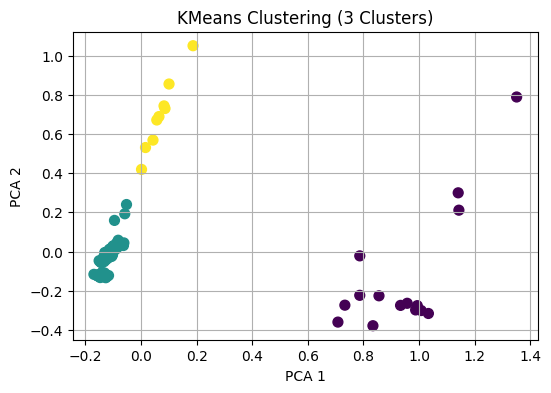

In [13]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.5014, Silhouette Score: 0.8313


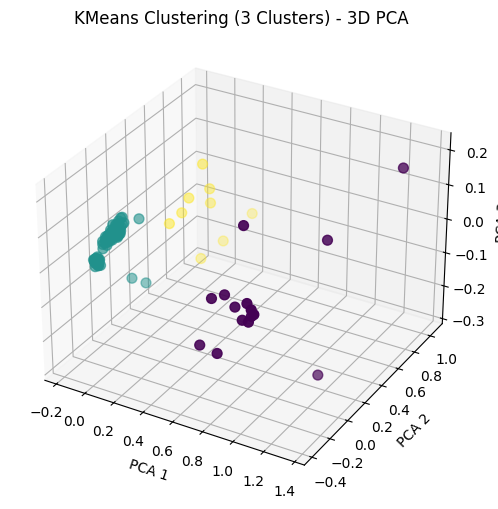

In [14]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Pada proses ini, saya melakukan clustering menggunakan algoritma K-Means dengan jumlah cluster sebanyak 4. Proses ini bertujuan untuk mengelompokkan data berdasarkan kemiripan fitur-fitur numerik yang terdapat pada dataset Iris

[4 Clusters] Inertia: 2.0507, Silhouette Score: 0.8345


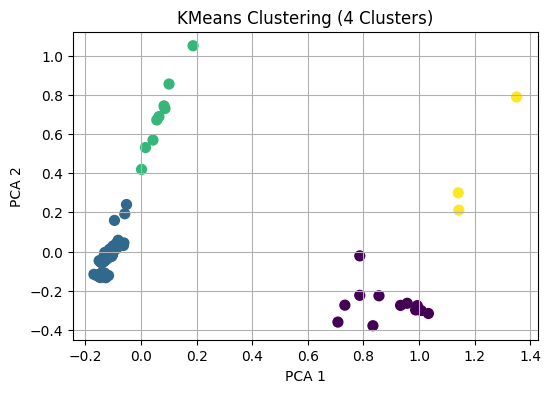

In [15]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 3.5014, Silhouette Score: 0.8313


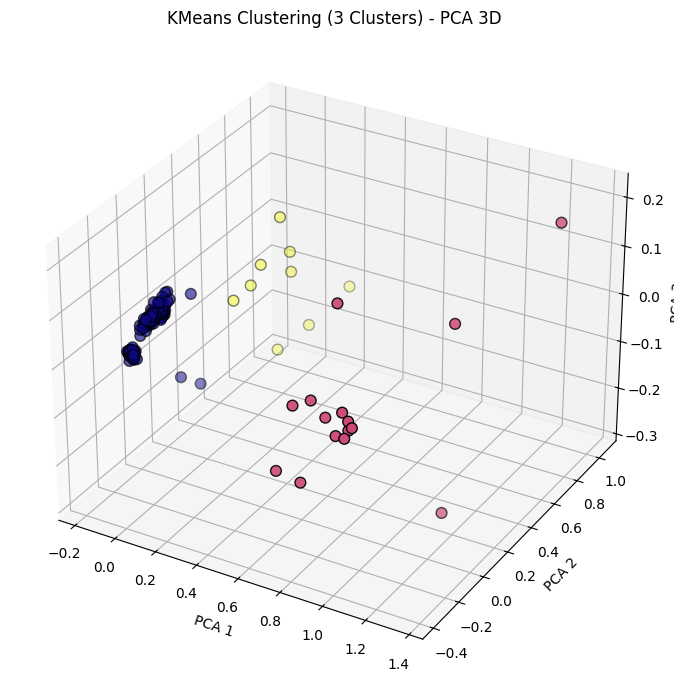

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA ke 3 dimensi
pca = PCA(n_components=3)
features_3d = pca.fit_transform(scaled_features)

# Clustering dengan KMeans (3 cluster)
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Evaluasi cluster
inertia = kmeans.inertia_
silhouette = silhouette_score(scaled_features, cluster_labels)

print(f"[3 Clusters] Inertia: {inertia:.4f}, Silhouette Score: {silhouette:.4f}")

# Visualisasi hasil clustering 3D
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    features_3d[:, 0], features_3d[:, 1], features_3d[:, 2],
    c=cluster_labels,
    cmap='plasma',
    s=60,
    edgecolor='k'
)

ax.set_title("KMeans Clustering (3 Clusters) - PCA 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.show()